In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Data on orbit
mu = 3.986004418e14
a = 6371e3 + 700e3
period = 2 * np.pi * np.sqrt(a**3/mu)
n = 2 * np.pi / period

class Simulation:
    
    def __init__(self, state_history, state_history_m = False, control_torque = False):
        
        self.state_history = state_history 
        
        if type(state_history_m) != type(False):
            self.state_history_m = state_history_m
            
        if type(control_torque) != type(False):
            self.control_torque = control_torque
            

CASE_PATH = 'output/Q5/zerobias/'
state_history = np.loadtxt(CASE_PATH + 'state_history.dat')
control_torque = np.loadtxt(CASE_PATH + 'control_torque.dat')
measurements = np.loadtxt(CASE_PATH + 'measurements.dat')
S = Simulation(state_history, control_torque = control_torque, state_history_m = measurements)

In [12]:
print(S.state_history.shape)
print(S.control_torque[:,0][:10])

(8899, 7)
[ 0.  0.  2.  4.  6.  8. 10. 12. 14. 16.]


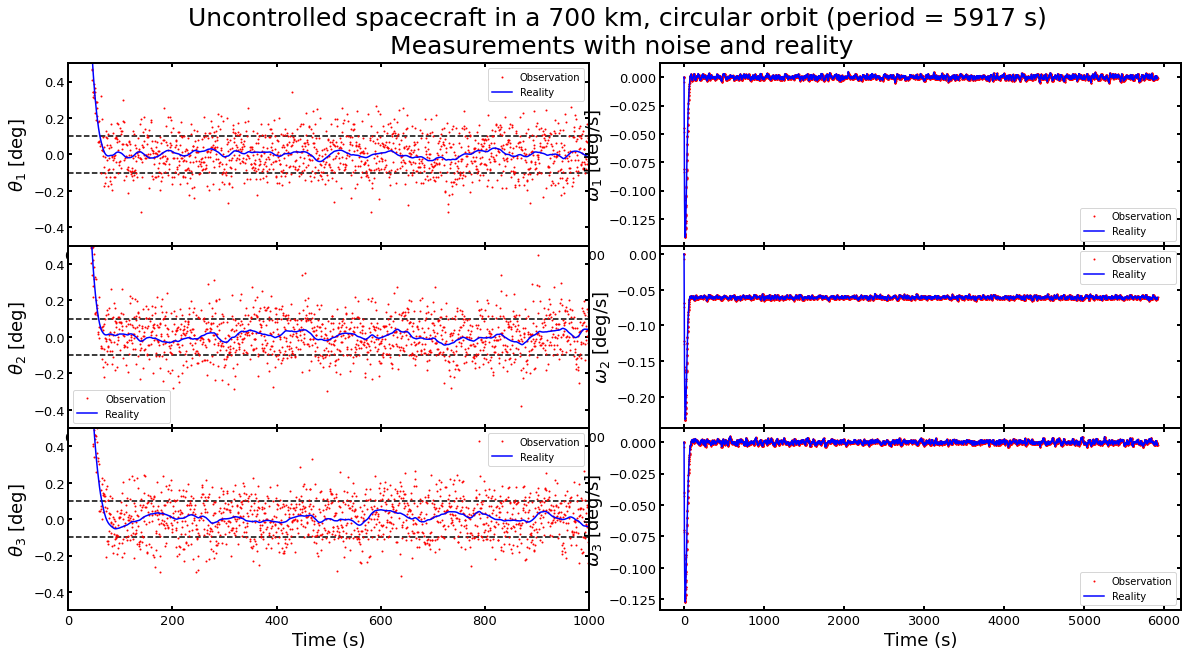

In [13]:
labels = [r"$\theta_1$ [deg]", r"$\theta_2$ [deg]", r"$\theta_3$ [deg]",
          "$\omega_1$ [deg/s]", "$\omega_2$ [deg/s]", "$\omega_3$ [deg/s]"]

fig, axes = plt.subplots(3, 2, figsize = (17, 9))
fig.tight_layout(pad=4)
fig.suptitle("Uncontrolled spacecraft in a 700 km, circular orbit (period = %.i s)\n Measurements with noise and reality" % period, fontsize = 25, y = 1.02)
fig.subplots_adjust(hspace=0)
axes[2, 0].set_xlabel("Time (s)", fontsize = 18)
axes[2, 1].set_xlabel("Time (s)", fontsize = 18)

for ax in axes[:,0]:
    ax.set_xlim(0, 200)
    ax.set_ylim(-5, 6)

    ax.set_xlim(0, 1000)
    ax.set_ylim(-0.5, 0.5)
    ax.axhline(0.1, color = 'k', linestyle = '--') 
    ax.axhline(-0.1, color = 'k', linestyle = '--') 
    
for i, ax in enumerate(axes.T.flat): 
    
    ax.plot(S.state_history_m[:,0], np.rad2deg(S.state_history_m[:,1+i]), 'ro', markersize = 1, label = "Observation")
    ax.plot(S.state_history[:,0], np.rad2deg(S.state_history[:,1+i]), 'b-', markersize = 1, label = "Reality")

    ax.set_ylabel(labels[i], fontsize = 18) 
    #ax.axvline(81)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(labelsize=13)
    ax.tick_params(axis="both",direction="in",which="both", length=4, width = 2)
    ax.tick_params(bottom=True, top=True, left=True, right=True)
    ax.legend()
    
    


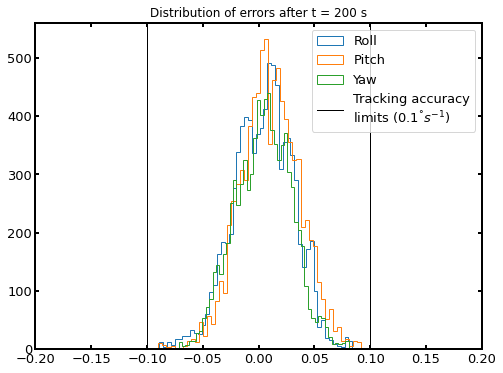

In [40]:
fig, ax = plt.subplots(figsize = (8, 6))

index_to_angle  = {0: "Roll",
                   1: "Pitch", 
                   2: "Yaw"} 

ax.set_title("Distribution of errors after t = 200 s")

for i in range(3): 
    plt.hist(np.rad2deg(S.state_history[:,i+1][S.state_history[:,0] > 200]), bins = 50, histtype= 'step', label = index_to_angle[i]) 

plt.axvline(-0.1, color = 'k', label = "Tracking accuracy\nlimits (0.1$^{\degree} s^{-1}$)", linewidth = 1)
plt.axvline(0.1, color = 'k', linewidth = 1)
plt.xlim(-0.2, 0.2)
ax.legend( loc= 'upper right', fontsize = 13)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(labelsize=13)
ax.tick_params(axis="both",direction="in",which="both", length=4, width = 2)
ax.tick_params(bottom=True, top=True, left=True, right=True)